In [37]:
#dependencias
import numpy as np
import pandas as pd
import sklearn.linear_model as linear
from sklearn.model_selection import train_test_split as split
import matplotlib.pyplot as plt
import seaborn as sb

# 1er dataset: info de precios de casas en california (https://www.kaggle.com/datasets/camnugent/california-housing-prices)

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

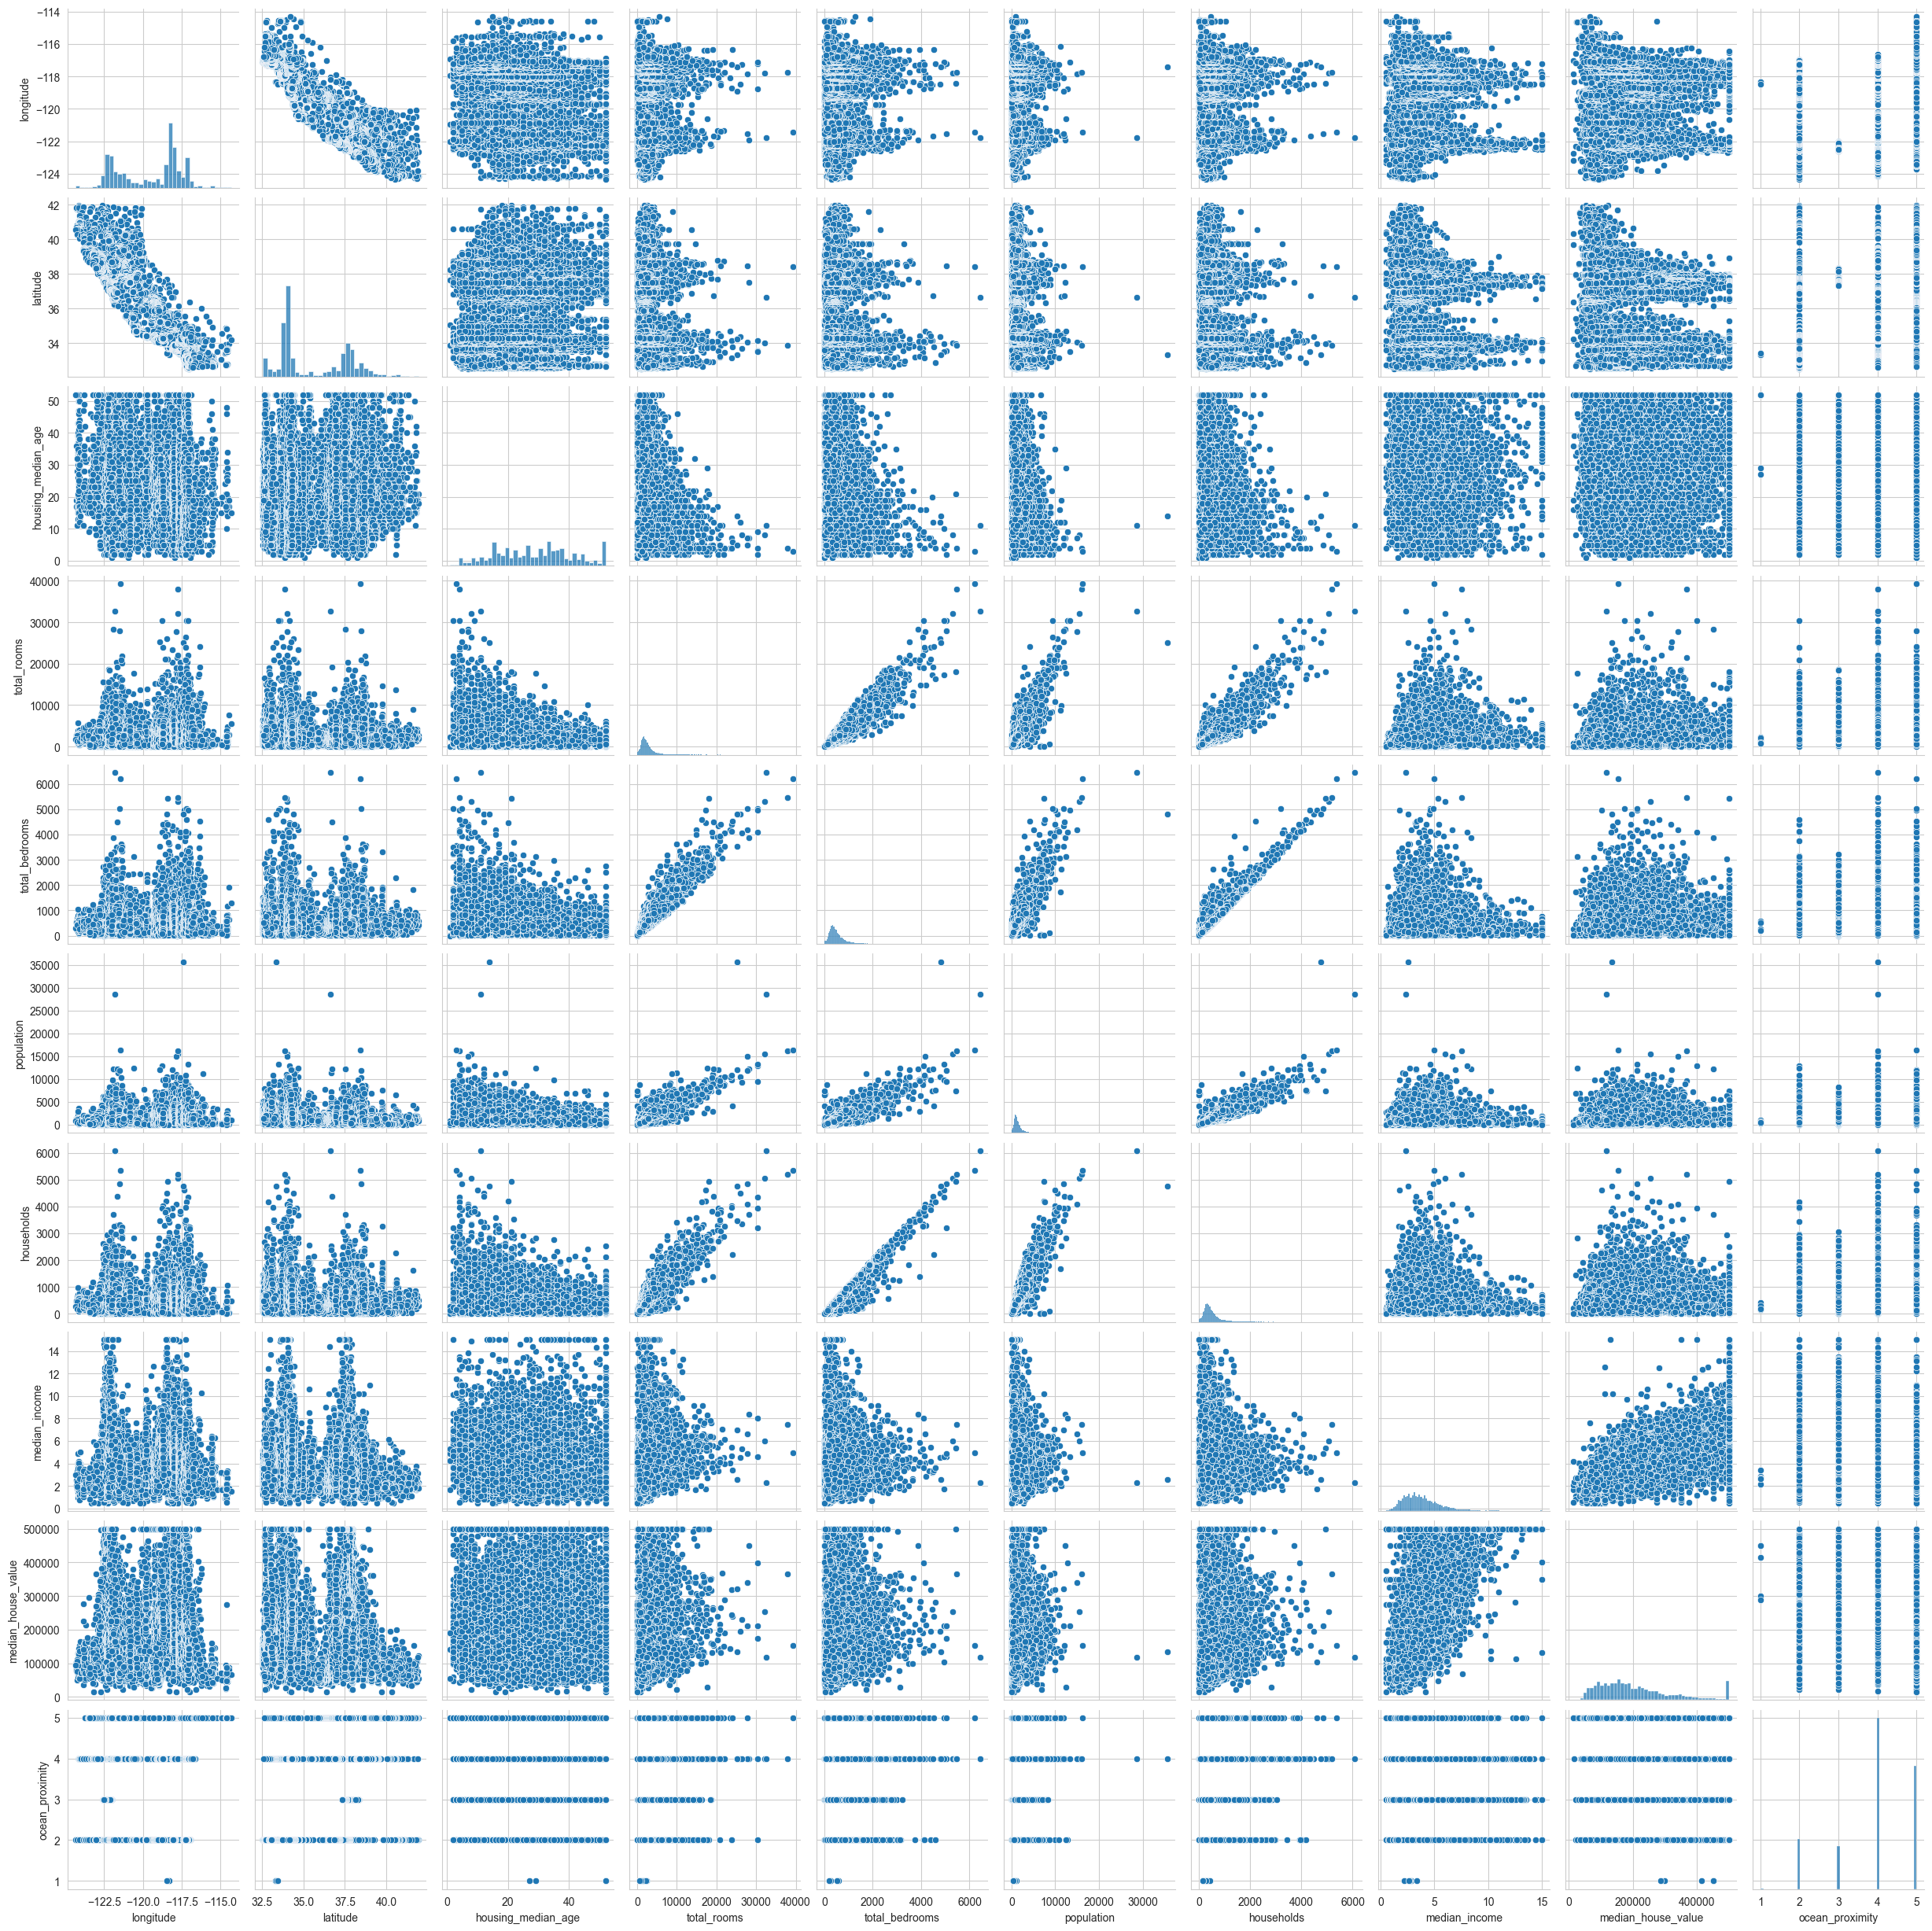

In [38]:
#leyendo el dataset y haciendo un preprocesamiento simple
data1 = pd.read_csv("datasets/housing.csv")
print(data1.describe())

#quitando columnas vacias
data1.dropna(inplace=True)

#para evitar un aviso de pandas al hacer replace
pd.set_option("future.no_silent_downcasting", True)

#transformando los valores categoricos de ocean_proximity (proximidad al oceano) a numericos
data1["ocean_proximity"] = data1["ocean_proximity"].replace(["ISLAND","NEAR OCEAN","NEAR BAY","<1H OCEAN","INLAND"],[1,2,3,4,5])

#haciendo pairplot para ver la relacion entre variables
sb.pairplot(data1)

0.6380254154163629
0.6425257232578222
[-3.55097407e+04 -3.52526385e+04  1.32654520e+03 -8.56623427e+00
  1.20679643e+02 -3.76504999e+01  4.15384920e+01  4.15615786e+04
 -6.03436011e+03]
-2967745.1124583515


<Axes: >

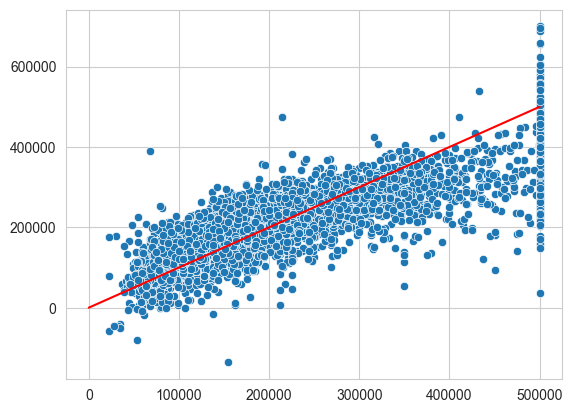

In [39]:
#seleccionando los datos para entrenar el modelo, primero con todas las variables excepto la que vamos a predecir
x = data1[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"]].values
y = data1["median_house_value"].values

#creamos el modelo, dividimos los datos en entrenamiento y test, y lo entrenamos
linearModel = linear.LinearRegression()
trainX,testX,trainY,testY = split(x,y,train_size=0.2)
linearModel.fit(trainX,trainY)

#viendo que tan bueno es el modelo
print(linearModel.score(testX,testY))
print(linearModel.score(trainX,trainY))

#mostrando los coeficientes para ver la importancia de cada variable
print(linearModel.coef_)
print(linearModel.intercept_)

#comparando las variables predecidas con las reales
yPredict = linearModel.predict(trainX)
sb.scatterplot(x=trainY,y=yPredict)
sb.lineplot(x=np.arange(1,max(trainY)),y=np.arange(1,max(trainY)),color=(1,0,0))

0.6074468416010599
0.5588165768168525
[-35059.81623622 -36154.52898659    762.87246644  35985.13084344
 -11888.24636046]
-2808687.117566378


<Axes: >

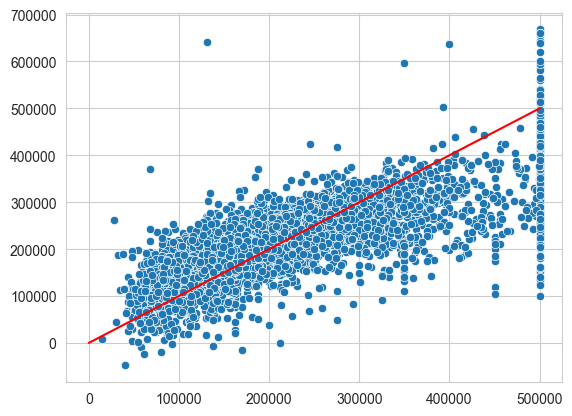

In [40]:
#volviendo a entrenar el modelo con las variables cuyo coeficiente parecio tener cierta importancia (>1e+03)
x = data1[["longitude","latitude","housing_median_age","median_income","ocean_proximity"]].values
y = data1["median_house_value"].values
linearModel = linear.LinearRegression()
trainX,testX,trainY,testY = split(x,y,train_size=0.2)
linearModel.fit(trainX,trainY)

#viendo que tan bueno es el modelo
print(linearModel.score(testX,testY))
print(linearModel.score(trainX,trainY))
print(linearModel.coef_)
print(linearModel.intercept_)

#comparando las variables predecidas con las reales
yPredict = linearModel.predict(trainX)
sb.scatterplot(x=trainY,y=yPredict)
sb.lineplot(x=np.arange(1,max(trainY)),y=np.arange(1,max(trainY)),color=(1,0,0))

# 2do dataset: dataset de precios de casas para... practicar regresion (https://www.kaggle.com/datasets/prokshitha/home-value-insights)

       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e

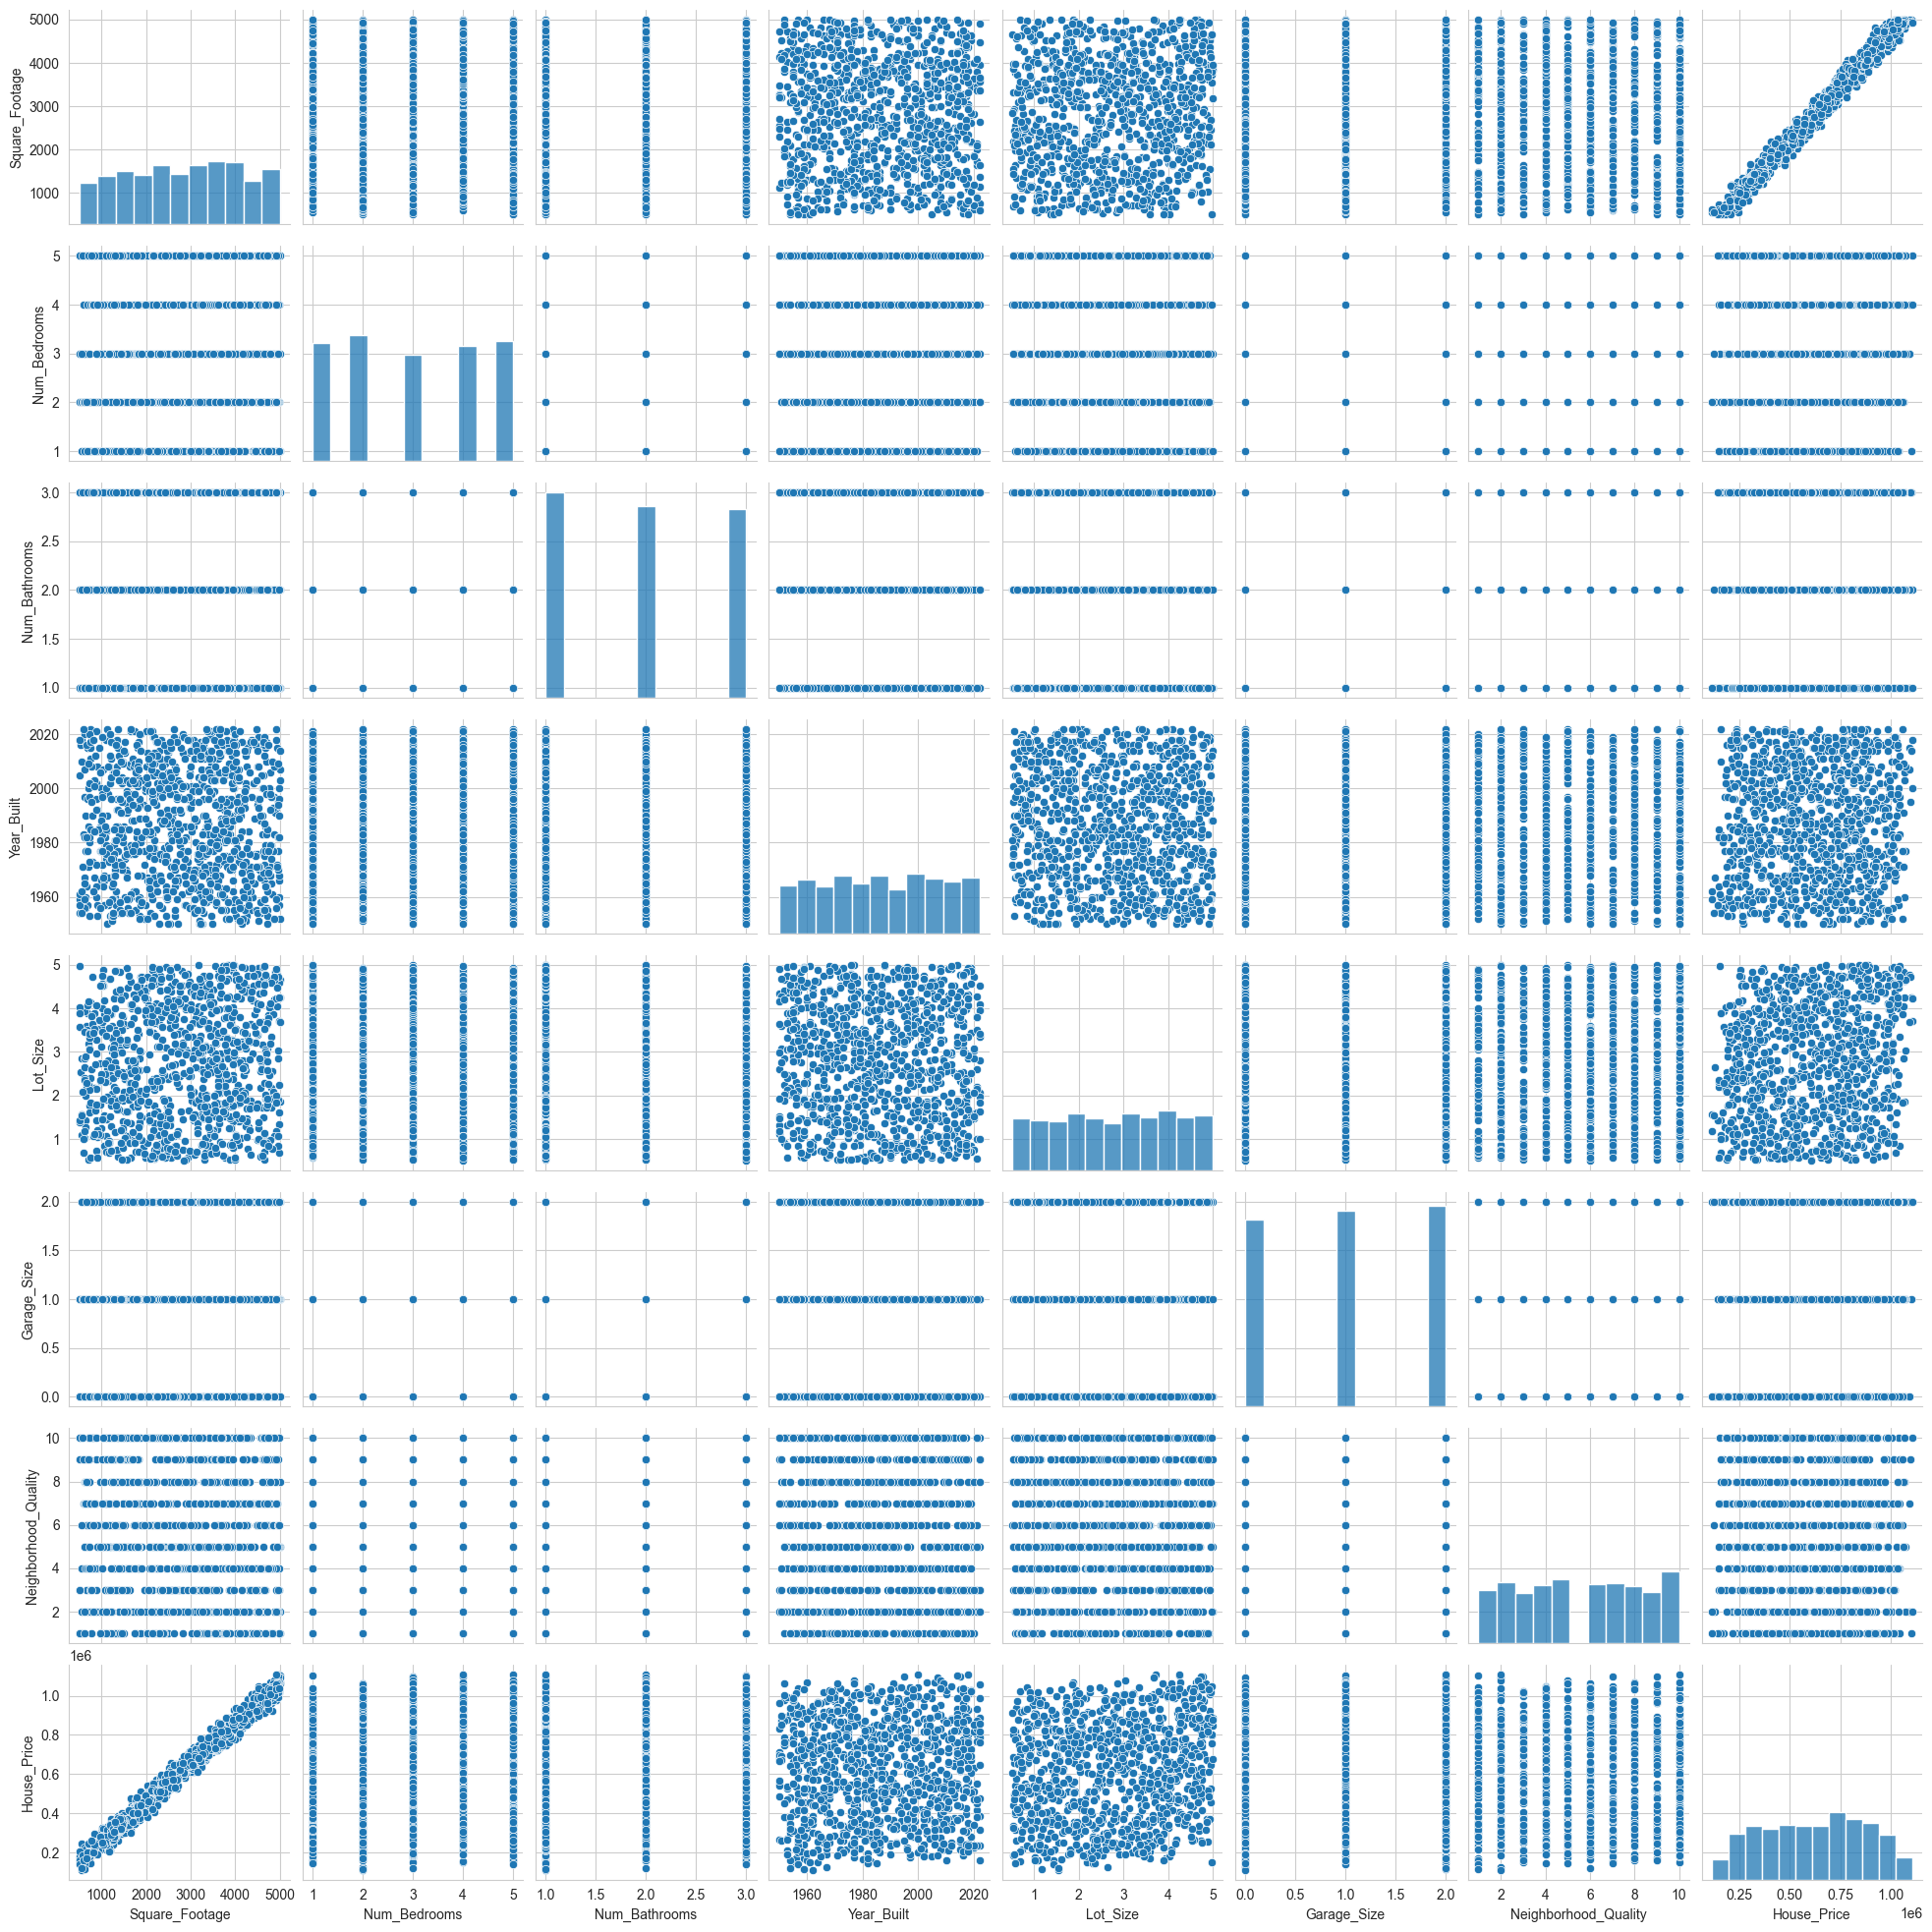

In [41]:
#leyendo el dataset
data2 = pd.read_csv("datasets/house_price_regression_dataset.csv")
print(data2.describe())

#viendo la relacion entre variables con un pairplot
sb.pairplot(data2)

0.9984425708572469
0.998631085227215
[  200.22439028 10740.86702956  7793.16186842   980.5668618
 15279.25243028  4288.27927008    68.81190588]
-1988177.7305475622


<Axes: >

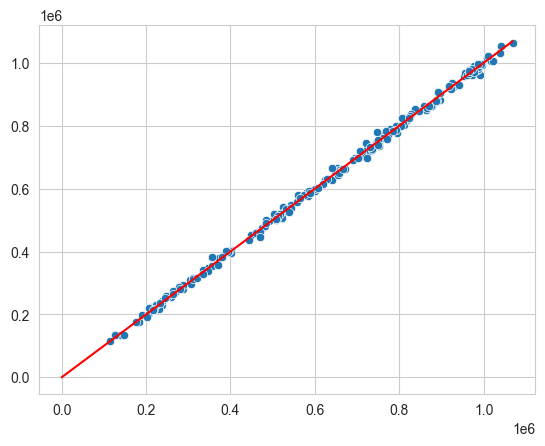

In [42]:
#haciendo entrenamiento de un modelo primero con todas las variables
x = data2[["Square_Footage","Num_Bedrooms","Num_Bathrooms","Year_Built","Lot_Size","Garage_Size","Neighborhood_Quality"]].values
y = data2["House_Price"].values

linearModel = linear.LinearRegression()
trainX,testX,trainY,testY = split(x,y,train_size=0.2)
linearModel.fit(trainX,trainY)

#viendo que tan bueno es el modelo
print(linearModel.score(testX,testY))
print(linearModel.score(trainX,trainY))

#observando los coeficientes para ver la importancia de las variables
print(linearModel.coef_)
print(linearModel.intercept_)

#comparando los precios reales con los predecidos
yPredict = linearModel.predict(trainX)
sb.scatterplot(x=trainY,y=yPredict)
sb.lineplot(x=np.arange(1,max(trainY)),y=np.arange(1,max(trainY)),color=(1,0,0))

0.9819997971290051
0.9843459673163536


<Axes: >

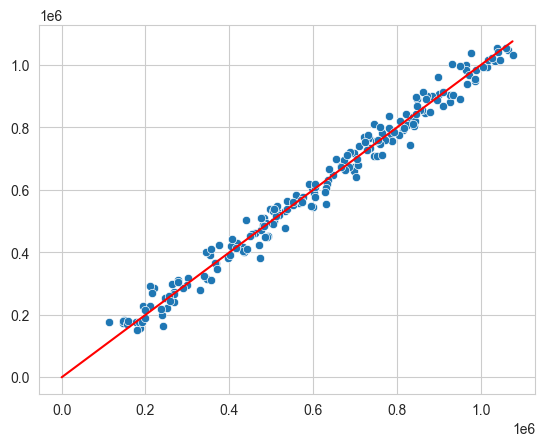

In [43]:
#minimizando variables incluyendo solo la que parece que tiene gran relacion en el pairplot (square_footage)
x = data2[["Square_Footage"]].values
y = data2["House_Price"].values
linearModel = linear.LinearRegression()
trainX,testX,trainY,testY = split(x,y,train_size=0.2)
linearModel.fit(trainX,trainY)

#viendo que tan bueno es el modelo
print(linearModel.score(testX,testY))
print(linearModel.score(trainX,trainY))

#comparando los precios reales con los predecidos
yPredict = linearModel.predict(trainX)
sb.scatterplot(x=trainY,y=yPredict)
sb.lineplot(x=np.arange(1,max(trainY)),y=np.arange(1,max(trainY)),color=(1,0,0))